In [31]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler

In [32]:
# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# # データの標準化
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# x_data_1_standardized = scaler_x.fit_transform(x_data_1.reshape(-1, 1)).flatten()
# x_data_2_standardized = scaler_x.fit_transform(x_data_2.reshape(-1, 1)).flatten()
# x_data_3_standardized = scaler_x.fit_transform(x_data_3.reshape(-1, 1)).flatten()

# y_data_1_standardized = scaler_y.fit_transform(y_data_1.reshape(-1, 1)).flatten()
# y_data_2_standardized = scaler_y.fit_transform(y_data_2.reshape(-1, 1)).flatten()
# y_data_3_standardized = scaler_y.fit_transform(y_data_3.reshape(-1, 1)).flatten()

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

In [33]:
# モデル関数の定義
def model(x, Kxx, Kyy, Kzz, Kxy, Kxz, Kyz, p, label):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    c = np.cos(np.radians(p))
    s = np.sin(np.radians(p))
    if label == 1:
        k1 = C*(C*Kxx + c*Kxy*S - s*Kxz*S) + c*S*(C*Kxy + c*Kyy*S - s*Kyz*S)-s*S*(C*Kxz + c*Kyz*S - s*Kzz*S)
        return k1
    elif label == 2:
        k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S*c) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S*c) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S*c) + 0.5*Kxz*S*s - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S*c) + 0.866025403784439*Kyz*S*s) + S*c*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S*c) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S*c) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S*c) + 0.866025403784439*Kxz*S*s - 0.5*Kyy*(-0.866025403784439*C - 0.5*S*c) + 0.5*Kyz*S*s) - S*s*(Kxz*(-0.5*C - 0.866025403784439*S*c) + Kyz*(-0.866025403784439*C - 0.5*S*c) - Kzz*S*s)
        return k2
    elif label == 3:
        k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S*c) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S*c) - 0.5*Kxy*(0.866025403784439*C - 0.5*S*c) + 0.5*Kxz*S*s + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S*c) - 0.866025403784439*Kyz*S*s) + S*c*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S*c) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S*c) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S*c) - 0.866025403784439*Kxz*S*s - 0.5*Kyy*(0.866025403784439*C - 0.5*S*c) + 0.5*Kyz*S*s) - S*s*(Kxz*(-0.5*C + 0.866025403784439*S*c) + Kyz*(0.866025403784439*C - 0.5*S*c) - Kzz*S*s)
        return k3

Fitted parameters: Kxx = -8.412416582280974 Kyy = 1.1799461739855748 Kzz = -3.570238305007912 Kxy = -0.029837726006322965 Kxz = 0.02645065368134728 Kyz = -3.2490513691531993 p = 52.472007189190144


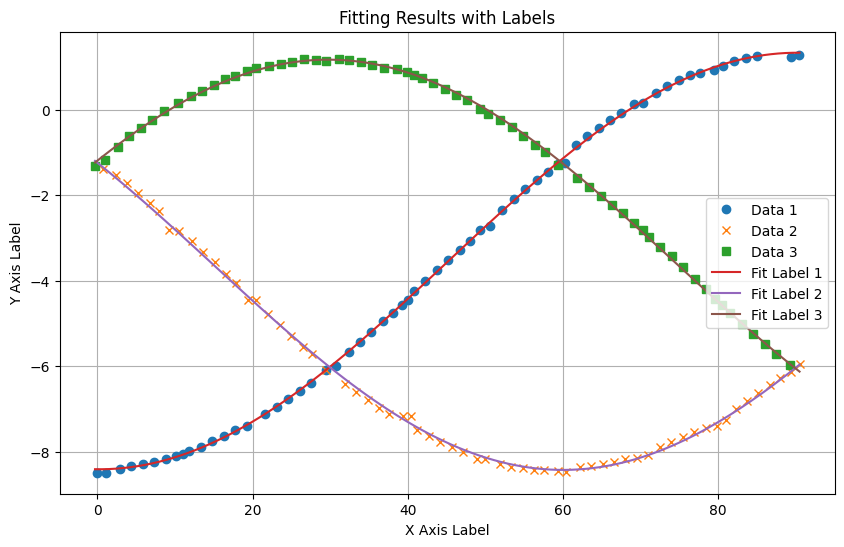

In [34]:
# データとラベルを結合
x_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, Kxx, Kyy, Kzz, Kxy, Kxz, Kyz, p):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, Kxx, Kyy, Kzz, Kxy, Kxz, Kyz, p, label)
    return y_model

# フィッティング
initial_guess = [1, 1, 1, 1, 1, 1, 1]  # 適切な初期値を設定
bounds = ([-10, -10, -10, -10, -10, -10, 0], [10, 10, 10, 10, 10, 10, 90])  # パラメータの範囲を設定
params, params_covariance = curve_fit(objective, x_labels, y_data_combined, p0=initial_guess, bounds=bounds)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kzz =", params[2], "Kxy =", params[3], "Kxz =", params[4], "Kyz =", params[5], "p =", params[6])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    y_fit = model(x_all, *params, label)
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()

In [35]:
# CSVファイルの読み込み
df1 = pd.read_csv('zx1.csv')
df2 = pd.read_csv('zx2.csv')
df3 = pd.read_csv('zx3.csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# データの標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data_1_standardized = scaler_x.fit_transform(x_data_1.reshape(-1, 1)).flatten()
x_data_2_standardized = scaler_x.fit_transform(x_data_2.reshape(-1, 1)).flatten()
x_data_3_standardized = scaler_x.fit_transform(x_data_3.reshape(-1, 1)).flatten()

y_data_1_standardized = scaler_y.fit_transform(y_data_1.reshape(-1, 1)).flatten()
y_data_2_standardized = scaler_y.fit_transform(y_data_2.reshape(-1, 1)).flatten()
y_data_3_standardized = scaler_y.fit_transform(y_data_3.reshape(-1, 1)).flatten()

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

In [36]:
# モデル関数の定義
def model(x, Kxx, Kyy, Kzz, Kxy, Kxz, Kyz, p, label):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    c = np.cos(np.radians(p))
    s = np.sin(np.radians(p))
    if label == 1:
        k1 = C*(C*Kzz + Kxz*S*c - Kyz*S*s) + S*c*(C*Kxz + Kxx*S*c - Kxy*S*s) - S*s*(C*Kyz + Kxy*S*c - Kyy*S*s)
        return k1
    elif label == 2:
        k2 = C*(C*Kzz + Kxz*(-0.5*S*c + 0.866025403784439*S*s) + Kyz*(-0.866025403784439*S*c + 0.5*S*s)) + S*c*(-0.5*C*Kxz - 0.866025403784439*C*Kyz - 0.5*Kxx*(-0.5*S*c + 0.866025403784439*S*s) - 0.5*Kxy*(-0.866025403784439*S*c + 0.5*S*s) - 0.866025403784439*Kxy*(-0.5*S*c + 0.866025403784439*S*s) - 0.866025403784439*Kyy*(-0.866025403784439*S*c + 0.5*S*s)) - S*s*(-0.866025403784439*C*Kxz - 0.5*C*Kyz - 0.866025403784439*Kxx*(-0.5*S*c + 0.866025403784439*S*s) - 0.866025403784439*Kxy*(-0.866025403784439*S*c + 0.5*S*s) - 0.5*Kxy*(-0.5*S*c + 0.866025403784439*S*s) - 0.5*Kyy*(-0.866025403784439*S*c + 0.5*S*s))
        return k2
    elif label == 3:
        k3 = C*(C*Kzz + Kxz*(-0.5*S*c - 0.866025403784439*S*s) + Kyz*(0.866025403784439*S*c + 0.5*S*s)) + S*c*(-0.5*C*Kxz + 0.866025403784439*C*Kyz - 0.5*Kxx*(-0.5*S*c - 0.866025403784439*S*s) + 0.866025403784439*Kxy*(-0.5*S*c - 0.866025403784439*S*s) - 0.5*Kxy*(0.866025403784439*S*c + 0.5*S*s) + 0.866025403784439*Kyy*(0.866025403784439*S*c + 0.5*S*s)) - S*s*(0.866025403784439*C*Kxz - 0.5*C*Kyz + 0.866025403784439*Kxx*(-0.5*S*c - 0.866025403784439*S*s) - 0.5*Kxy*(-0.5*S*c - 0.866025403784439*S*s) + 0.866025403784439*Kxy*(0.866025403784439*S*c + 0.5*S*s) - 0.5*Kyy*(0.866025403784439*S*c + 0.5*S*s))
        return k3

Fitted parameters: Kxx = -8.707277648100401 Kyy = 0.9389648514693939 Kzz = -0.1491160942242241 Kxy = -0.3119729590969767 Kxz = -0.008479494663001635 Kyz = 8.916526555096315 p = 0.42702796867982307


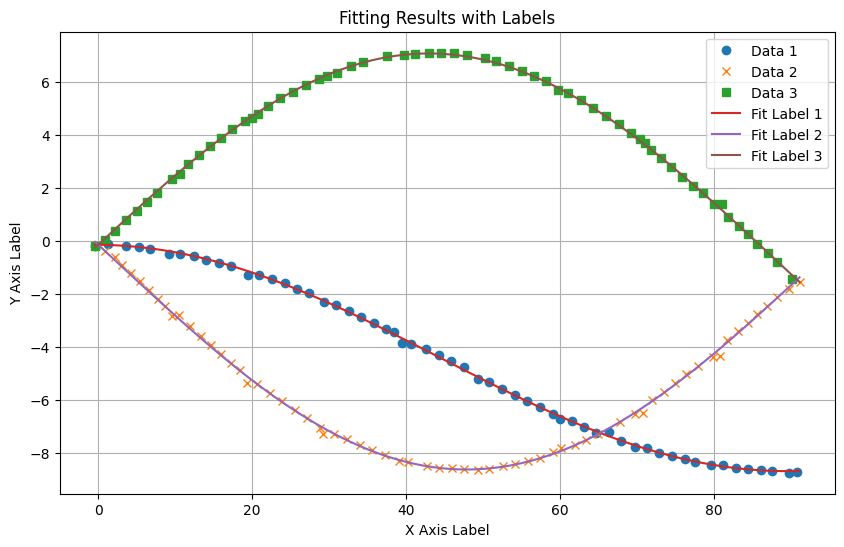

In [37]:
# データとラベルを結合
data_with_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, Kxx, Kyy, Kzz, Kxy, Kxz, Kyz, p):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, Kxx, Kyy, Kzz, Kxy, Kxz, Kyz, p, label)
    return y_model

# フィッティング
initial_guess = [1, 1, 1, 1, 1, 1, 1]  # 適切な初期値を設定
bounds = ([-10, -10, -10, -10, -10, -10, 0], [10, 10, 10, 10, 10, 10, 90])  # パラメータの範囲を設定
params, params_covariance = curve_fit(objective, data_with_labels, y_data_combined, p0=initial_guess, bounds=bounds)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kzz =", params[2], "Kxy =", params[3], "Kxz =", params[4], "Kyz =", params[5], "p =", params[6])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    y_fit = model(x_all, *params, label)
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()

In [38]:
# CSVファイルの読み込み
df1 = pd.read_csv('zy1.csv')
df2 = pd.read_csv('zy2.csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df2['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df2['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# データの標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data_1_standardized = scaler_x.fit_transform(x_data_1.reshape(-1, 1)).flatten()
x_data_2_standardized = scaler_x.transform(x_data_2.reshape(-1, 1)).flatten()
x_data_3_standardized = scaler_x.transform(x_data_3.reshape(-1, 1)).flatten()

y_data_1_standardized = scaler_y.fit_transform(y_data_1.reshape(-1, 1)).flatten()
y_data_2_standardized = scaler_y.transform(y_data_2.reshape(-1, 1)).flatten()
y_data_3_standardized = scaler_y.transform(y_data_3.reshape(-1, 1)).flatten()

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

In [39]:
# モデル関数の定義
def model(x, Kxx, Kyy, Kzz, Kxy, Kzx, Kyz, p, label):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    c = np.cos(np.radians(p))
    s = np.sin(np.radians(p))
    
    if label == 1:
        k1 = C*(C*Kzz - Kyz*S*c + Kzx*S*s) - S*c*(C*Kyz + Kxy*S*s - Kyy*S*c) + S*s*(C*Kzx + Kxx*S*s - Kxy*S*c)
        return k1
    elif label == 2:
        k2 = C*(C*Kzz + Kyz*(0.5*S*c - 0.866025403784439*S*s) + Kzx*(0.866025403784439*S*c - 0.5*S*s)) - S*c*(-0.5*C*Kyz - 0.866025403784439*C*Kzx - 0.866025403784439*Kxx*(0.866025403784439*S*c - 0.5*S*s) - 0.866025403784439*Kxy*(0.5*S*c - 0.866025403784439*S*s) - 0.5*Kxy*(0.866025403784439*S*c - 0.5*S*s) - 0.5*Kyy*(0.5*S*c - 0.866025403784439*S*s)) + S*s*(-0.866025403784439*C*Kyz - 0.5*C*Kzx - 0.5*Kxx*(0.866025403784439*S*c - 0.5*S*s) - 0.5*Kxy*(0.5*S*c - 0.866025403784439*S*s) - 0.866025403784439*Kxy*(0.866025403784439*S*c - 0.5*S*s) - 0.866025403784439*Kyy*(0.5*S*c - 0.866025403784439*S*s))
        return k2
    elif label == 3:
        k3 = C*(C*Kzz + Kyz*(0.5*S*c + 0.866025403784439*S*s) + Kzx*(-0.866025403784439*S*c - 0.5*S*s)) - S*c*(-0.5*C*Kyz + 0.866025403784439*C*Kzx + 0.866025403784439*Kxx*(-0.866025403784439*S*c - 0.5*S*s) - 0.5*Kxy*(-0.866025403784439*S*c - 0.5*S*s) + 0.866025403784439*Kxy*(0.5*S*c + 0.866025403784439*S*s) - 0.5*Kyy*(0.5*S*c + 0.866025403784439*S*s)) + S*s*(0.866025403784439*C*Kyz - 0.5*C*Kzx - 0.5*Kxx*(-0.866025403784439*S*c - 0.5*S*s) + 0.866025403784439*Kxy*(-0.866025403784439*S*c - 0.5*S*s) - 0.5*Kxy*(0.5*S*c + 0.866025403784439*S*s) + 0.866025403784439*Kyy*(0.5*S*c + 0.866025403784439*S*s))
        return k3

Fitted parameters: Kxx = -8.53671278994877 Kyy = 1.1256268816990582 Kzz = -0.15973572600736666 Kxy = -0.09176083541810534 Kzx = 0.10893778134976005 Kyz = 8.797039822942773 p = 0.7094841701907735


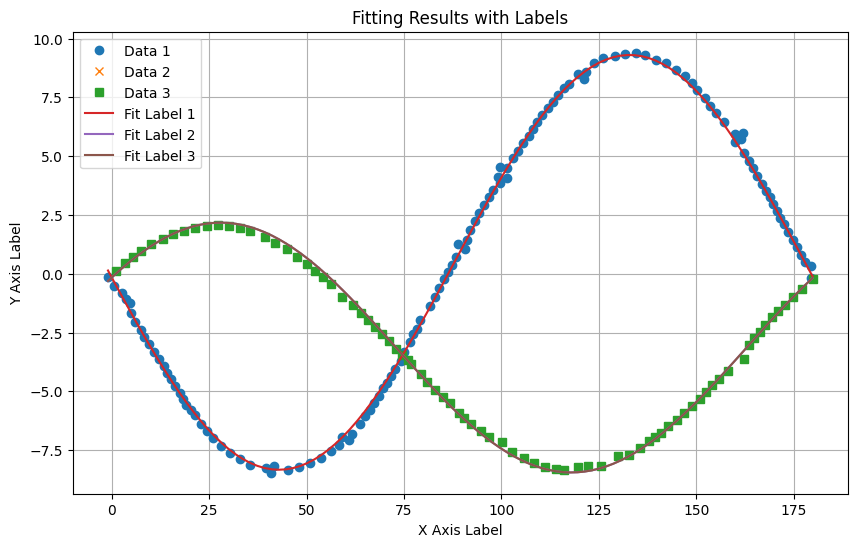

In [40]:
# データとラベルを結合
data_with_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, Kxx, Kyy, Kzz, Kxy, Kzx, Kyz, p):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, Kxx, Kyy, Kzz, Kxy, Kzx, Kyz, p, label)
    return y_model

# フィッティング
initial_guess = [1, 1, 1, 1, 1, 1, 1]  # 適切な初期値を設定
bounds = ([-10, -10, -10, -10, -10, -10, 0], [10, 10, 10, 10, 10, 10, 90])  # パラメータの範囲を設定
params, params_covariance = curve_fit(objective, data_with_labels, y_data_combined, p0=initial_guess)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kzz =", params[2], "Kxy =", params[3], "Kzx =", params[4], "Kyz =", params[5], "p =", params[6])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    y_fit = model(x_all, *params, label)
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()